In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.optimize import curve_fit
import os 
import re

In [131]:
pol = pd.read_csv('../misc_files/obspol.csv', skiprows=3, index_col=0)
theta = -2*pol.loc['smc_x-1/02007201']['PA']*np.pi/180

spectrum = pd.read_csv('../spectra_files/smc_x-1/02007201/spectra_0.2.csv')
rotation = np.array([
                        [np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]
                        ])
qu_vector = np.array([spectrum['Q']/spectrum['I'], spectrum['U']/spectrum['I']])
rotated_qu = np.matmul(rotation, np.array([spectrum['Q']/spectrum['I'], spectrum['U']/spectrum['I']]))
rotated_normq = rotated_qu[0]
rotated_normu = rotated_qu[1]
print(len(rotated_normq))
print(len(rotated_normu))

30
30


In [132]:

spectra_normstokes = pd.DataFrame()
for source_dir in os.listdir('../spectra_files'):
    source_path = os.path.join('../spectra_files', source_dir)
    if os.path.isdir(source_path):
        for obsid_dir in os.listdir(source_path):
            obsid_path = os.path.join(source_path, obsid_dir)
            if os.path.isdir(obsid_path):
                obsid_trimmed = f'{obsid_path.split('/')[-2]}/{obsid_path.split('/')[-1]}'
                if obsid_trimmed != 'her_x-1/01001899': # for some reason the rmf doesn't work with this one
                    print(f'Processing {obsid_trimmed}')
                    
                    spectrum = pd.read_csv(f'{obsid_path}/spectra_0.2.csv')
                    pol = obspol.loc[obsid_trimmed]
                    theta = -2*pol['PA']*np.pi/180
                    rotation = np.array([
                        [np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]
                        ])
                    qu_vector = np.array([spectrum['Q']/spectrum['I'], spectrum['U']/spectrum['I']])
                    # qu_vector = np.array([spectrum['Q'], spectrum['U']])
                    rotated_qu = np.matmul(rotation, qu_vector)
                    rotated_normq = rotated_qu[0]
                    rotated_normu = rotated_qu[1]
                    normstokes = np.concatenate([rotated_normq, rotated_normu])
                    spectra_normstokes[f'{obsid_trimmed}'] = normstokes



Processing swift_j1727/03006001
Processing swift_j1727/02251301
Processing swift_j1727/02250901
Processing swift_j1727/02251001
Processing swift_j1727/03005801
Processing swift_j1727/02251101
Processing swift_j1727/03005701
Processing swift_j1727/02251201
Processing cen_x-3/01250201
Processing cen_x-3/01006501
Processing gro_j1008-57/02003501
Processing gro_j1008-57/02003601
Processing gx_5-1/02002799
Processing gx_9+1/03003801
Processing gx_3+1/03004101
Processing v395_car/03001201
Processing gx_9+9/01002401
Processing cir_x-1/02002699
Processing lmc_x-1/02001901
Processing 4u_1735-44/03004001
Processing sco_x-1/02002401
Processing 4u_1820-303/02002399
Processing cyg_x-3/02001899
Processing cyg_x-3/02250301
Processing cyg_x-3/03250301
Processing cyg_x-3/02009101
Processing smc_x-1/02007001
Processing smc_x-1/02007101
Processing smc_x-1/02007201
Processing gx_340+0/03009901
Processing gx_340+0/03003301
Processing cyg_x-2/01001601
Processing cyg_x-2/01006601
Processing exo_2030+375/0225

In [141]:
spectra.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
swift_j1727/03006001,-0.000802,-0.001028,-0.005574,0.003140,0.003536,0.007777,0.009332,0.004116,0.001118,0.018840,...,0.380427,-0.570563,3.053143,-5.208502,0.223533,-0.221158,-0.315030,-0.097480,-0.159360,0.146705
swift_j1727/02251301,-0.002315,-0.004476,0.009528,0.007516,0.008628,0.010176,0.008194,0.009472,0.015787,0.015257,...,0.001341,-0.014545,-0.005311,-0.025704,0.030684,0.039056,-0.011842,-0.008291,-0.048244,0.006872
swift_j1727/02250901,0.007017,0.011341,0.013059,0.011586,0.011088,0.018071,0.014848,0.017570,0.021654,0.017874,...,-0.013372,-0.009244,-0.000933,0.007443,-0.004037,-0.002625,0.001133,0.016010,-0.002000,0.034369
swift_j1727/02251001,0.008130,0.012890,0.008450,0.011984,0.010185,0.015686,0.012477,0.015605,0.014470,0.019806,...,0.001044,-0.004266,0.000201,0.016545,-0.020912,0.012649,-0.009821,0.003920,0.007742,0.028549
swift_j1727/03005801,0.007573,0.004446,0.009244,0.006134,0.011462,0.009856,0.018263,0.005078,0.016298,0.021188,...,-0.030852,0.020149,-0.049798,-0.034377,-0.067497,0.063485,-0.003510,0.091377,0.080925,-0.004075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cyg_x-1/03010001,0.008119,0.007792,0.007633,0.006527,0.019568,0.014444,0.020609,0.012643,0.012819,0.026602,...,0.021562,0.043495,0.017991,0.029795,-0.019943,-0.024792,0.049951,-0.047811,0.093435,-0.035646
cyg_x-1/02008501,0.000889,0.003983,0.006995,0.002466,0.008077,0.004635,0.008160,0.002302,0.006511,0.004579,...,-0.000485,0.039544,0.016236,0.006859,0.034810,0.068193,0.023834,0.036253,-0.013008,-0.038105
cyg_x-1/03003101,-0.000643,0.006650,0.008720,0.008369,0.010468,0.019285,-0.002985,0.013505,0.007333,0.018022,...,0.031442,0.007264,-0.001938,0.033623,0.022184,-0.001532,-0.061308,0.031747,-0.029811,-0.049221
cyg_x-1/01250101,0.007483,0.008721,0.008336,0.007613,0.014609,0.012785,0.013843,0.016526,0.010935,0.022438,...,0.005374,-0.001925,-0.001567,0.027170,-0.017123,0.045369,0.003328,0.012768,-0.038798,0.021571


In [133]:
# Assuming you have a dataframe `df` with your data
# Standardize the data before applying PCA
spectra = spectra_normstokes
# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spectra.T)
# scaled_data = spectra
# Apply PCA
k = 30  # Number of components to keep
pca = PCA(n_components=k)  
# pca = PCA()  
principal_components = pca.fit_transform(scaled_data)

# Create a new dataframe with the principal components
# k = len(principal_components[0])
# columns = [f'PC{i+1}' for i in range(k)]
# pca_df = pd.DataFrame(data=principal_components, columns=columns)
# print(pca_df)

In [134]:
spectra = spectra_normstokes
scaler = StandardScaler()
scaled_data = scaler.fit_transform(spectra.T)
k = 20  # Number of components to keep
pca = PCA(n_components=k)  
principal_components = pca.fit(scaled_data)
pcs = principal_components.components_
print(np.shape(pcs))

(20, 60)


In [135]:
# # Create a new dataframe with the principal components
# columns = [f'PC{i+1}' for i in range(k)]
# pca_df = pd.DataFrame(data=principal_components, columns=columns)
# print(pca_df)

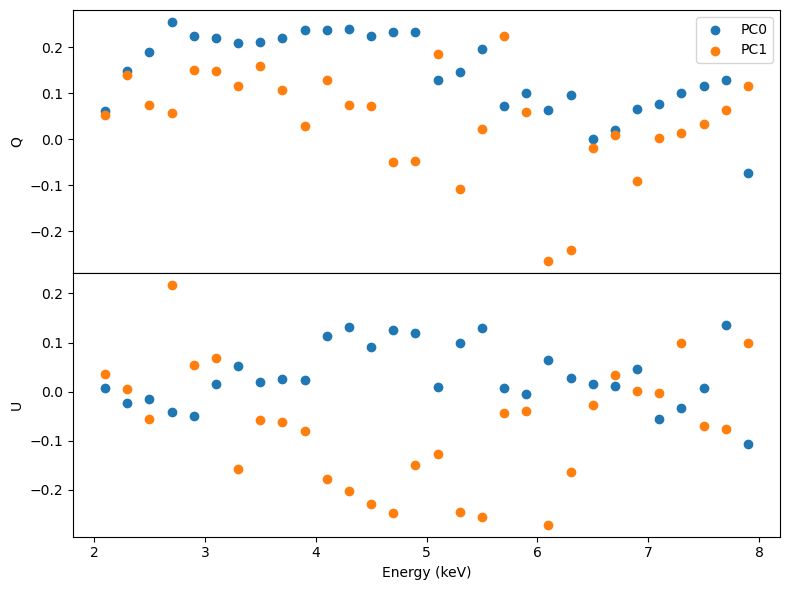

In [136]:
# Plot the leading two principal components


stokes = ['Q', 'U']
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
K=2
for i, stokes in enumerate(stokes):
    for j in range(K):
        ax[i].scatter(spectrum['energy'], pcs[j][30*i:30*(i+1)], label=f'PC{j}')
    ax[i].set_ylabel(f'{stokes}')
ax[1].set_xlabel('Energy (keV)')
ax[0].legend()
plt.tight_layout()
plt.subplots_adjust(hspace=0)

Fitted parameters: a = 0.22825298281214745, b = 1.2436738341071925


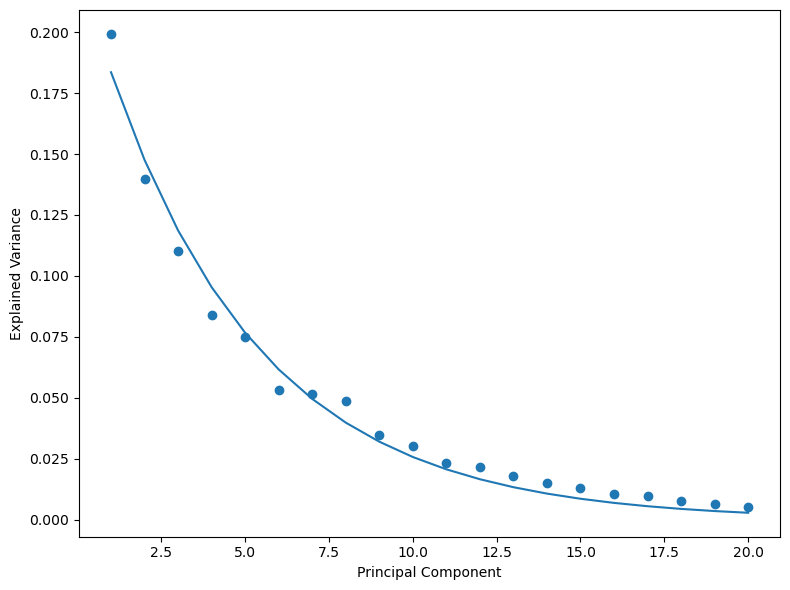

In [137]:
def exponential(x, a, b):
    return a * np.power(b, -x)

def fit_exponential(x_data, y_data):
    """
    Parameters:
    x_data (array-like): The independent variable data.
    y_data (array-like): The dependent variable data.

    Returns:
    tuple: The optimal values for the parameters a and b.
    """
    params, _ = curve_fit(exponential, x_data, y_data)
    return params

x = np.array(range(1, len(pca.explained_variance_ratio_)+1))
a, b = fit_exponential(x, pca.explained_variance_ratio_)
print(f"Fitted parameters: a = {a}, b = {b}")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x, pca.explained_variance_ratio_, label='Explained Variance')
ax.plot(x, exponential(x, a, b), label='Fit')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_yscale('linear')
# ax.set_ylim(1e-4, 1)
fig.tight_layout()

Fitted parameters: a = 31.25801400414765, b = 1.10049154404448


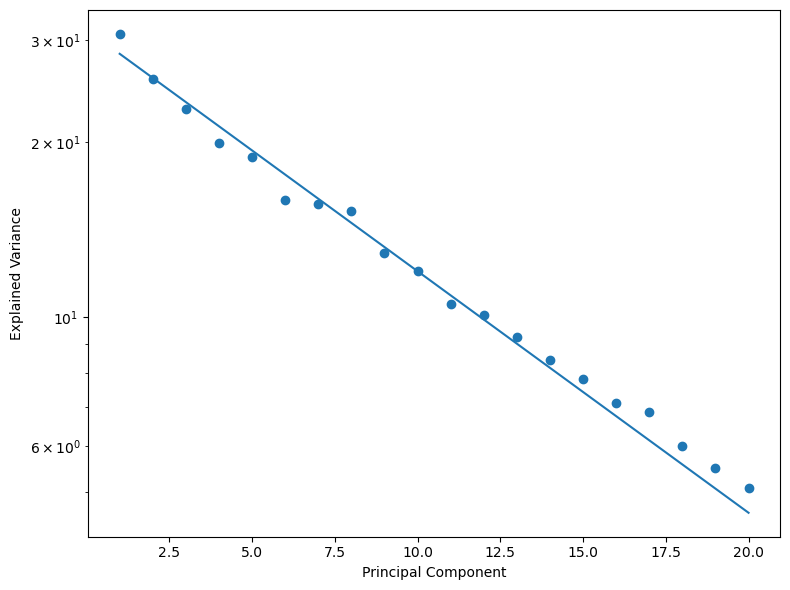

In [138]:
x = np.array(range(1, len(pca.singular_values_)+1))
a, b = fit_exponential(x, pca.singular_values_)
print(f"Fitted parameters: a = {a}, b = {b}")

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(x, pca.singular_values_, label='Explained Variance')
ax.plot(x, exponential(x, a, b), label='Fit')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
ax.set_yscale('log')
# ax.set_ylim(1e-4, 1)
fig.tight_layout()

[ 0.0468563   0.043311    0.06122428  0.02841796  0.06065764  0.03394956
  0.06917333  0.06273928  0.01976063  0.04403464  0.06792594  0.01417736
  0.06906259 -0.00790011  0.05494764  0.02532841  0.00632441  0.01009884
  0.03067019 -0.08611347  0.02333985  0.03920039 -0.09548101 -0.03636577
 -0.03087967 -0.0350862  -0.03537182 -0.13363276  0.11447473 -0.02142997
  0.05583372  0.04512517  0.0464194   0.00789468  0.0723321   0.06752312
  0.03426248  0.00231932 -0.07741042 -0.01406907 -0.05405196  0.02658417
 -0.1295541   0.00731376 -0.05824973  0.0058766   0.02288375 -0.02734833
 -0.07891929 -0.03953244  0.01993733  0.02112823  0.06222877 -0.00712202
 -0.09790626  0.05932337 -0.03809532  0.06427205 -0.0231335  -0.05329117]


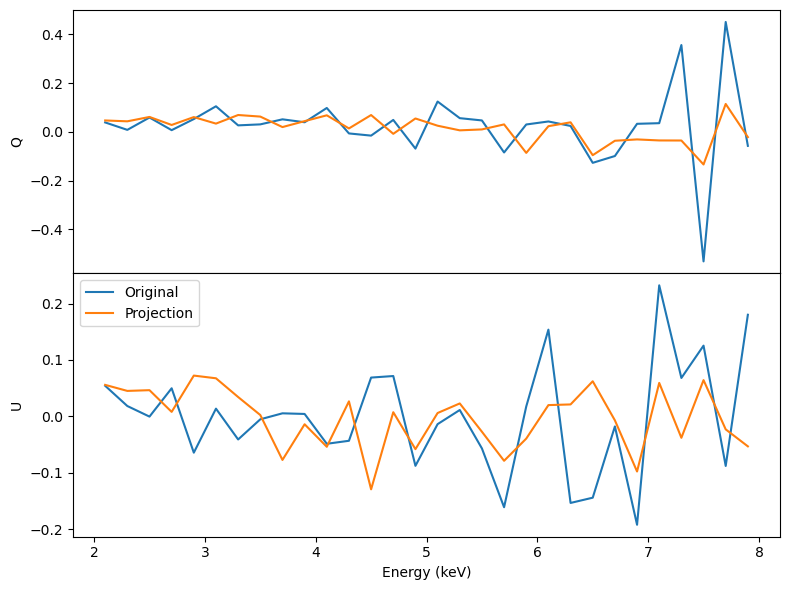

In [139]:
def project_onto_pcs(test_data_point, pcs, k):
    """
    Projects a test data point onto the first k principal components.

    Parameters:
    test_data_point (array-like): The test data point to be projected.
    pcs (array-like): The principal components, shape (n, m).
    k (int): The number of principal components to project onto.

    Returns:
    array-like: The projection of the test data point onto the first k principal components.
    """
    # Ensure k does not exceed the number of principal components
    k = min(k, pcs.shape[0])
    
    # Select the first k principal components
    selected_pcs = pcs[:k, :]
    
    # Project the test data point onto the selected principal components
    projection = np.dot(selected_pcs, test_data_point)
    
    return projection

# Example usage
test_data_point = spectra.iloc[:, np.random.randint(0, 80)]
# test_data_point = spectra.iloc[:, 10]
test_data_point /= np.linalg.norm(test_data_point)
k = 10  # Number of principal components to project onto

projection = project_onto_pcs(test_data_point, pcs, k)
projection_vectors = [projection[i] * pcs[i] for i in range(k)]
reconstructed_data_point = np.sum(projection_vectors, axis=0)
print(reconstructed_data_point)
fig, ax = plt.subplots(2, 1, figsize=(8, 6))
for i in range(2):
    ax[i].plot(spectrum['energy'], test_data_point[i*30:(i+1)*30], label='Original')
    ax[i].plot(spectrum['energy'], reconstructed_data_point[i*30:(i+1)*30], label='Projection')
ax[1].legend()
ax[1].set_xlabel('Energy (keV)')
ax[0].set_ylabel('Q')
ax[1].set_ylabel('U')
plt.tight_layout()
plt.subplots_adjust(hspace=0)

In [140]:
from scipy.optimize import curve_fit

def power_law(x, a, b, c):
    return a * np.power(x, -b) + c

def fit_power_law(x_data, y_data):
    """
    Fits data to a power-law function y = a * x^-b.

    Parameters:
    x_data (array-like): The independent variable data.
    y_data (array-like): The dependent variable data.

    Returns:
    tuple: The optimal values for the parameters a and b.
    """
    params, _ = curve_fit(power_law, x_data, y_data)
    return params

# Example usage

a, b, c = fit_power_law(spectrum['energy'], pcs[1][:30])
print(f"Fitted parameters: a = {a}, b = {b}, c = {c}")
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(spectrum['energy'], pcs[1], label='PC1')
ax.plot(spectrum['energy'], power_law(spectrum['energy'], a, b, c), label='Fit')
fig.tight_layout()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.